In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter

In [2]:
N = 3 # Total od nodes in the star graph

### Creating the star graph

In [3]:
G_star = nx.star_graph(N-1)

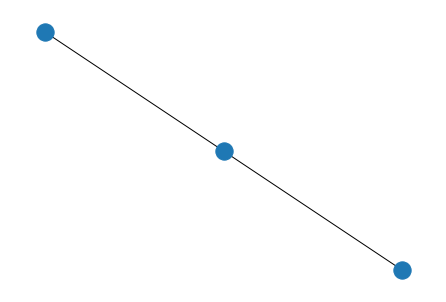

In [4]:
nx.draw(G_star)

### (A) Ranges of $j$ and $k$ in the sum of star graph

http://networksciencebook.com/chapter/7#measuring-degree

In [5]:
unique_degrees = np.unique([G_star.degree(n) for n in G_star.nodes()])
unique_degrees

array([1, 2])

The ranges of degree in a star network is only two degrees: $N - 1$ (the central node) and $1$ (all other nodes)

### (B) What is the definition and values of $ejk$ ?

$ejk$ is the degree corelation matrix, its shows the probability to a link selected randomly have nodes with degree $j$ and $k$

In [6]:
def average_degree(G):
    '''
    G: A graph
    
    This function calculate de average dregee for the garph G, and return this value round to UP
    '''
    # Sum of all degrees
    total_deg = sum([G.degree(n) for n in G.nodes()])
    # Total of degree * 1 / total de nodes (like a formula)
    avg_degree =  total_deg  * 1/ G.number_of_nodes()
    
    return avg_degree

In [7]:
average_degree(G_star)

1.3333333333333333

In [8]:
list_of_prob = [] #List wit hthe probability between two nodes
for degree in unique_degrees:
    for degree2 in unique_degrees:
        #Set value equals zero because star network dont have self links
        if degree == degree2:
            list_of_prob.append(0)
        else:
            list_of_prob.append((degree * degree2) / (G_star.number_of_edges()))

In [9]:
# The variable eij (adjacente matriz 'i' rows 'j' columns)
probability_matrix = np.reshape(list_of_prob, (2, 2))
probability_matrix

array([[0., 1.],
       [1., 0.]])

The values for $j$ and $k$ in a star graph are 1 for both, because the end of link have a node with degree $1$ or $N-1$. <br>
And the formula $7.2$ confirms this, because the sum of probabilitis is equal to $1$ <br> $\sum\limits_{i,j} {e_{ij} }  = 1 \hspace{10 mm} (7 . 2)$

### (C) What is the definition of and values $qj$?

$qj$ is the probability to find a node with degree $j$ in a randomly selected link.

In [10]:
def degree_probability(G):
    deg = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
    dict_deg_distribution = Counter(deg) # Count how many times each degree apears
    
    dist_prob_degree = {} # List with probability of each degree
    for deg_dist in dict_deg_distribution:
        dist_prob_degree[deg_dist] = (dict_deg_distribution[deg_dist]/len(deg))
        
    return dist_prob_degree

In [11]:
# Get the avegare degree
K_average = average_degree(G_star)

# Get the degree probability
pK = degree_probability(G_star)
print(f'The probability for find each degree in the network is: {pK}')

The probability for find each degree in the network is: {2: 0.3333333333333333, 1: 0.6666666666666666}


After find the probability for find a link with degree $k$ in the network. It's possible find $qk$ that represents the probability to find a node with degree $k$ at the end of a link. The formula $(7.3)$ shows hows $q_k  = \frac{{kp_k }}{{\left\langle k \right\rangle }} \hspace{10 mm} (7 . 3)$

In [12]:
qK = {} #Dicitionary with probability to find the degree in the end of the link
for degree in pK:
    qK[degree] = degree * pK[degree] / K_average
    
print(f'The values for qK are: {qK}')

The values for qK are: {2: 0.5, 1: 0.5}


The values for $qj$ are $0.5$ (in the example for $N = 3$ for both possibles values for $j$ ($1$ and $N-1$).

### (D) What is the value of this sum for the star network $S(N)$?


$\sum\limits_{jk}{jk(e_{jk}  - q_j q_k )}$

In [13]:
df_degree_prob = pd.DataFrame(probability_matrix, columns=unique_degrees).set_index(unique_degrees)
df_degree_prob

,1,2
1,0.0,1.0
2,1.0,0.0


I dont used the formula $(7.5)$ $e_{ij}  = q_i q_j$ because this network dont look neutral, but disassortative, because the hubs (central node in the star) don't conected to anothers hubs (because don't exist other hubs), but to small degrees (all other nodes in the star network). 

In [14]:
cum_sum = 0
for j in unique_degrees:
    for k in unique_degrees:
        if j != k: #Only sum conection between nodes (not self links)
            cum_sum += (j*k)*(df_degree_prob[j][k] - (qK[j]*qK[k]))

In [15]:
print(f'The value of sum for N={N} is: {cum_sum} ')

The value of sum for N=3 is: 3.0 


### (E) What is the range of k in this sum for the star network $S(N)$?


The range is between the degree of center node ($N-1$) and all other nodes ($1$) <br>
For example: $N = 3$ we have two different degrees in the network $1$ and $2$.

### (F) Determine the value of $a$ for $S(N)$.

$a = \sum\limits_{k} K_{qk}$

In [16]:
a = 0
for qk_idx in unique_degrees:
    a += qk_idx * qK[qk_idx]

In [17]:
print(f'The value of a for N={N} is: {a} ')

The value of a for N=3 is: 1.5 


### (G) Determine the value of $b$ for $S(N)$.

$b = \sum\limits_{k} K^{2}_{qk}$

In [18]:
b = 0
for qk_idx in unique_degrees:
    b += (qk_idx**2) * qK[qk_idx]

In [19]:
print(f'The value of b for N={N} is: {b} ')

The value of b for N=3 is: 2.5 


### (H) Compute $σ^2 = b − a 2$ for $S(N)$.

In [20]:
sqr_sigma = b - (a **2)

In [21]:
print(f'The value of square sigma for N={N} is: {sqr_sigma} ')

The value of square sigma for N=3 is: 0.25 


### (I) Compute $r$ for $S(N)$ dividing the value from item 1d by the value of $σ$


In [22]:
r = 1/sqr_sigma * cum_sum

In [23]:
print(f'The value of r for N={N} is: {r} ')

The value of r for N=3 is: 12.0 
